In [10]:
import pandas as pd

# Import the dataset using pandas
df = pd.read_csv("Dentistry Dataset.csv")

# Display the first few rows
print(df.head())


   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

In [11]:
# Check for missing values
print(df.isnull().sum())

#dropping rows with missing values
df = df.dropna()


Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variable 'Gender'
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Verify the encoding
print(df['Gender'].value_counts())


Series([], Name: count, dtype: int64)


In [13]:
X = df.drop(columns=['Gender', 'Sample ID', 'Sl No']) 
y = df['Gender']  # Target variable

# Check the shapes to ensure correctness
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")


Shape of X: (0, 11), Shape of y: (0,)


In [14]:
# Normalize the data
if not X.empty:
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
    print(X_normalized.head())
else:
    print("X is empty or contains only missing values. Check your preprocessing steps.")


X is empty or contains only missing values. Check your preprocessing steps.


C:\Users\Admin\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Admin\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


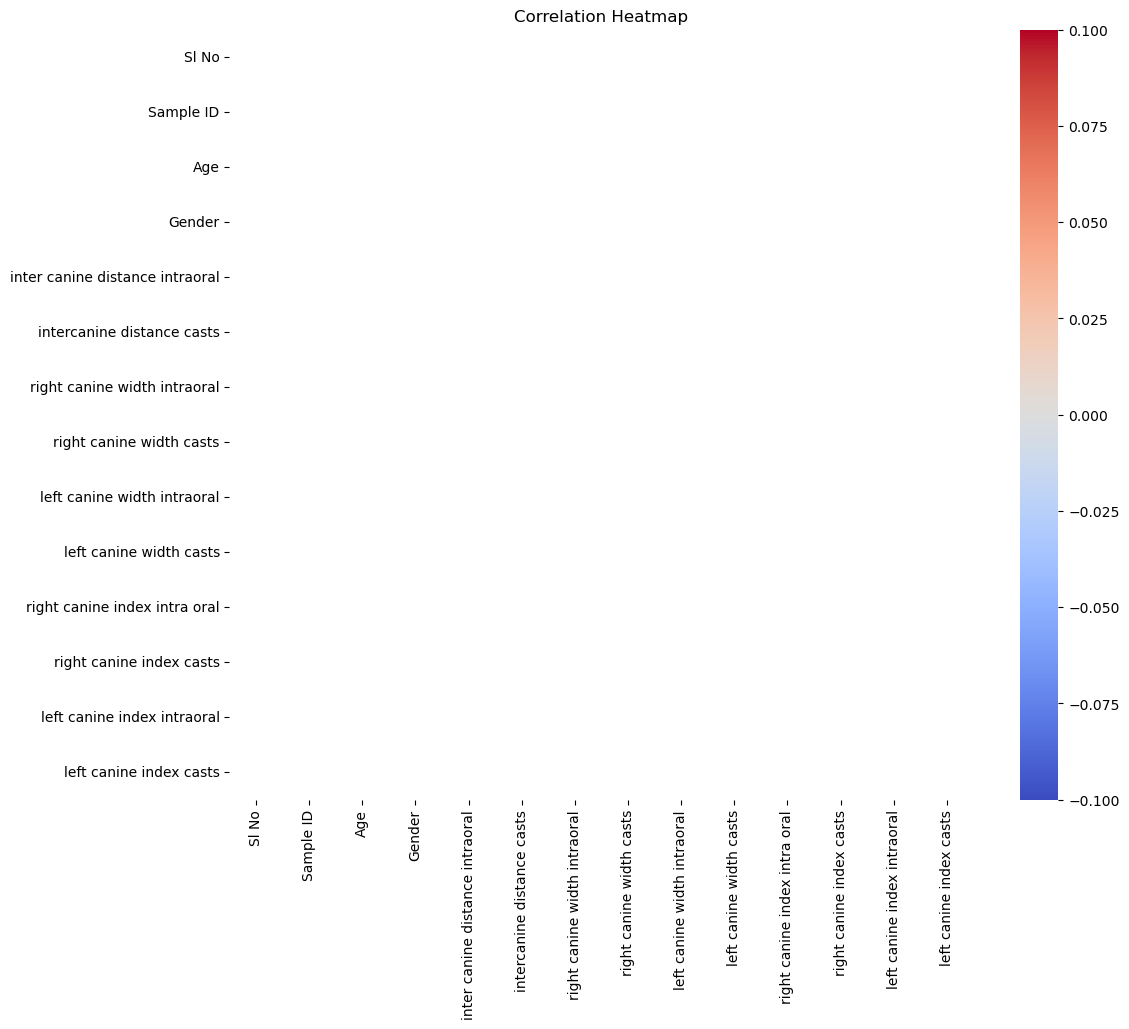

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [20]:
df = pd.read_csv("Dentistry Dataset.csv")

df = df.drop(columns=['Sample ID', 'Sl No'])

#handling missing values
df = df.dropna()

# Define X and y
X = df.drop(columns=['Gender']) 
y = df['Gender']

# Normalize X using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [22]:
unwanted_vars = ['inter canine distance intraoral', 'intercanine distance casts']

# Drop unwanted variables from X_normalized
X_final = X_normalized.drop(columns=unwanted_vars, axis=1)



In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Check the shapes to ensure correct splitting
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (880, 9), y_train shape: (880,)
X_test shape: (220, 9), y_test shape: (220,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

# Classification report
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8090909090909091
              precision    recall  f1-score   support

      Female       0.81      0.81      0.81       113
        Male       0.80      0.80      0.80       107

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

# Classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.8954545454545455
              precision    recall  f1-score   support

      Female       0.92      0.87      0.89       113
        Male       0.87      0.93      0.90       107

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit LabelEncoder on y and transform y to numeric labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Only transform test set (do not fit again)

# Check the classes that were encoded
print("Encoded classes:", le.classes_)

# Now proceed with model training and evaluation


Encoded classes: ['Female' 'Male']


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred_xgb = xgb.predict(X_test)

# Convert predictions back to original labels if needed
y_pred_xgb_original = le.inverse_transform(y_pred_xgb)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")

# Classification report
print(classification_report(y_test_encoded, y_pred_xgb))


XGBoost Classifier Accuracy: 0.8954545454545455
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       113
           1       0.87      0.93      0.90       107

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='.2f', cbar=False, 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

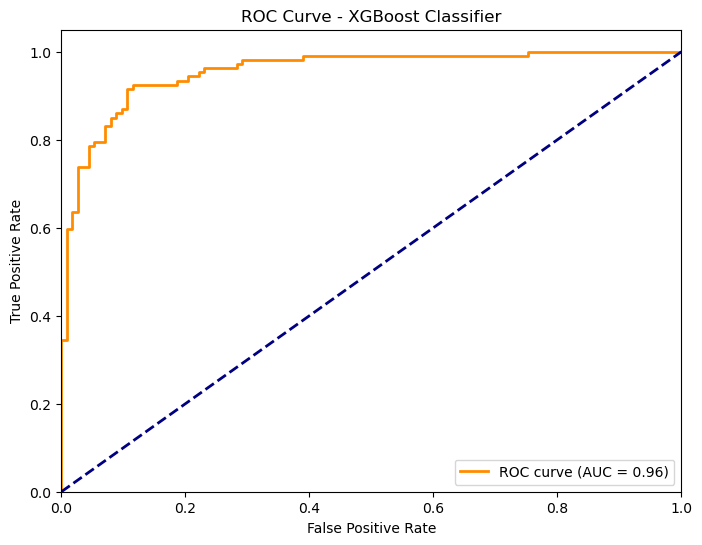

In [16]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for XGBoost classifier
fpr, tpr, thresholds = roc_curve(y_test_encoded, xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()
